In [1]:
from shutil import copyfile
from osgeo import gdal            ## GDAL support for reading virtual files
import os                         ## To create and remove directories
#import matplotlib.pyplot as plt   ## For plotting
import numpy as np                ## Matrix calculations
import glob                       ## Retrieving list of files

In [2]:
# Ordner erstellen 
home_dir = os.getenv("HOME")
tutorial_home_dir = os.path.abspath(os.path.join(home_dir, "work/tops"))
slc_dir = os.path.join(tutorial_home_dir,'slc')
processing_DEM_dir  =  os.path.join(tutorial_home_dir,'DEM/DEM1')
geocoding_DEM_dir  =  os.path.join(tutorial_home_dir,'DEM/DEM3')
print("home directory: ", tutorial_home_dir)

# generate all the folders in case they do not exist yet
if not os.path.exists(tutorial_home_dir):
    os.makedirs(tutorial_home_dir)
if not os.path.exists(slc_dir):
    os.makedirs(slc_dir)
if not os.path.exists(processing_DEM_dir):
    os.makedirs(processing_DEM_dir)
if not os.path.exists(geocoding_DEM_dir):
    os.makedirs(geocoding_DEM_dir)
os.chdir(tutorial_home_dir)

home directory:  /home/robin/work/tops


In [3]:
# In den Ordner springen, wo die Prozessierung stattfinden wird
os.chdir(tutorial_home_dir)

In [4]:
ASF_USER = "robin.kohrs@gmx.de"
ASF_PASS = "Rotole11"

In [ ]:
files = ['https://datapool.asf.alaska.edu/SLC/SA/S1A_IW_SLC__1SSV_20160606T122537_20160606T122601_011590_011B5B_E555.zip',
         'https://datapool.asf.alaska.edu/SLC/SA/S1A_IW_SLC__1SSV_20160910T122542_20160910T122606_012990_0148FA_76D7.zip',]

if len(ASF_USER)==0 or len(ASF_PASS)==0:
    raise Exception("Specifiy your ASF password and user (earthdata log-in)")
    
for file in files:
    filename = os.path.basename(file)
    
    if not os.path.exists(os.path.join(slc_dir,filename)):
        cmd = "wget {0} --user={1} --password={2}".format(file,ASF_USER, ASF_PASS)
        print(cmd)
        os.chdir(slc_dir)
        os.system(cmd)

    else:
        print(filename + " already exists")
    os.chdir(tutorial_home_dir)

wget https://datapool.asf.alaska.edu/SLC/SA/S1A_IW_SLC__1SSV_20160606T122537_20160606T122601_011590_011B5B_E555.zip --user=robin.kohrs@gmx.de --password=Rotole11


In [8]:
import os
from shutil import copyfile

## Directory where we will perform the topsApp processing
processing_dir  =  os.path.join(tutorial_home_dir,'insar/20160606_20160910')

## Check if output directory already exists. If not create it
if not os.path.isdir(processing_dir):
    os.makedirs(processing_dir)

In [9]:
os.chdir(processing_dir)

In [10]:
os.getcwd()

'/home/robin/work/notebooks/tops_test/insar/20141102_20171127'

In [68]:
!topsApp.py topsApp.xml --dosteps

This is the Open Source version of ISCE.
Some of the workflows depend on a separate licensed package.
To obtain the licensed package, please make a request for ISCE
through the website: https://download.jpl.nasa.gov/ops/request/index.cfm.
Alternatively, if you are a member, or can become a member of WinSAR
you may be able to obtain access to a version of the licensed sofware at
https://winsar.unavco.org/software/isce
2020-05-10 16:01:23,531 - isce.insar - INFO - ISCE VERSION = 2.3, RELEASE_SVN_REVISION = 2531,RELEASE_DATE = 20190112, CURRENT_SVN_REVISION = 2531
ISCE VERSION = 2.3, RELEASE_SVN_REVISION = 2531,RELEASE_DATE = 20190112, CURRENT_SVN_REVISION = 2531
None
The currently supported sensors are:  ['SENTINEL1']
Input XML files:  ['/vsizip/../../slc/S1A_IW_SLC__1SSV_20141103T195043_20141103T195057_003122_00395A_F396.zip/S1A_IW_SLC__1SSV_20141103T195043_20141103T195057_003122_00395A_F396.SAFE/annotation/s1a-iw3-slc-vv-20141103t195045-20141103t195057-003122-00395a-003.xml']
Input TIF

API open (R): geom_master/IW3/lat_01.rdr
API close:  geom_master/IW3/lat_01.rdr
API close:  geom_master/IW3/lon_01.rdr
API open (R): geom_master/IW3/lon_01.rdr
API close:  geom_master/IW3/lon_01.rdr
API close:  geom_master/IW3/hgt_01.rdr
API open (R): geom_master/IW3/hgt_01.rdr
API close:  geom_master/IW3/hgt_01.rdr
API close:  geom_master/IW3/los_01.rdr
API open (R): geom_master/IW3/los_01.rdr
API close:  geom_master/IW3/los_01.rdr
GDAL close: demLat_N14_N16_Lon_W025_W023.dem.wgs84.vrt
2020-05-10 16:02:04,750 - isce.zerodop.topozero - WARNING - Default Peg heading set to: -0.21234218497510862
Polynomial Order: 0 - by - 0 
0	
Polynomial Order: 0 - by - 1 
901090	2.32956	
GDAL open (R): demLat_N14_N16_Lon_W025_W023.dem.wgs84.vrt
API open (WR): geom_master/IW3/lat_02.rdr
API open (WR): geom_master/IW3/lon_02.rdr
API open (WR): geom_master/IW3/hgt_02.rdr
API open (WR): geom_master/IW3/los_02.rdr
C pointer already created. Finalize and recreate if image dimensions changed.
C pointer alread

2020-05-10 16:04:14,209 - isce.topsinsar.overlaps - INFO - Overlap directory geom_master/overlaps/IW3 already exists
2020-05-10 16:04:14,209 - isce.topsinsar.overlaps - INFO - Submaster Overlap directory master/overlaps/IW3 already exists
Top:  ['master/overlaps/IW3/burst_top_01_02.slc']
Bottom:  ['master/overlaps/IW3/burst_bot_01_02.slc']
Top:  ['master/overlaps/IW3/burst_top_01_02.slc', 'master/overlaps/IW3/burst_top_02_03.slc']
Bottom:  ['master/overlaps/IW3/burst_bot_01_02.slc', 'master/overlaps/IW3/burst_bot_02_03.slc']
Top:  ['master/overlaps/IW3/burst_top_01_02.slc', 'master/overlaps/IW3/burst_top_02_03.slc', 'master/overlaps/IW3/burst_top_03_04.slc']
Bottom:  ['master/overlaps/IW3/burst_bot_01_02.slc', 'master/overlaps/IW3/burst_bot_02_03.slc', 'master/overlaps/IW3/burst_bot_03_04.slc']
2020-05-10 16:04:14,363 - isce.topsinsar.overlaps - INFO - 
####################################################################################################
    runSubsetOverlaps
-----------

Turning off bistatic delay correction term by default.
API open (WR): coarse_offsets/overlaps/IW3/range_bot_02_03.off
API open (WR): coarse_offsets/overlaps/IW3/azimuth_bot_02_03.off
GDAL open (R): geom_master/overlaps/IW3/hgt_02_03.rdr.vrt
GDAL open (R): geom_master/overlaps/IW3/lat_02_03.rdr.vrt
GDAL open (R): geom_master/overlaps/IW3/lon_02_03.rdr.vrt
 Orbit interpolation method: hermite
 threads          12
 Starting Acquisition time:    71450.019390000001     
 Stop Acquisition time:    71453.491224557831     
 Azimuth line spacing in secs:    2.0555562805384402E-003
 Near Range in m:    901089.93452292646     
 Far  Range in m:    956256.29496149998     
 Range sample spacing in m:    2.3295621147153232     
 Radar Image Lines:         1690
 Radar Image Width:        23682
 reading dem ...
 Geocoded Lines:           113
 Geocoded Samples:       23682
 Dopplers:    0.0000000000000000        0.0000000000000000     
 geo2rdr on           12  threads...
 Processing line:            1

 At line         1000
 Interpolating image
 Elapsed time:    3.41015625    
GDAL close: coarse_offsets/overlaps/IW3/range_top_01_02.off.vrt
GDAL close: coarse_offsets/overlaps/IW3/azimuth_top_01_02.off.vrt
GDAL close: slave/IW3/burst_01.slc.vrt
API close:  coarse_coreg/overlaps/IW3/burst_top_01_02.slc
API open (R): coarse_coreg/overlaps/IW3/burst_top_01_02.slc
API close:  coarse_coreg/overlaps/IW3/burst_top_01_02.slc
Adjust valid samples
Before:  0 23681
Offsets :  0 0
Adjust valid lines
Before:  0 114
Offsets :  0 0
After:  0 114
Chi squared: 0.000030
Polynomial Order: 5 - by - 3 
14972.8	-721.203	39.0875	1.13243	
-58473.5	2796.34	-133.391	-4.14754	
57089.5	-2710.43	111.43	3.78036	
-2.22772e-09	2.3777e-09	-9.09283e-10	0	
1.57375e-09	-6.37736e-10	0	0	
-4.49745e-10	0	0	0	
Misfit radians - Max: 0.00010816515714395791 , Min : -0.00020548453176161274 
2020-05-10 16:04:32,293 - isce.stdproc.resamp_slc - WARNING - The variable INPUT_LINES has been set to the default value 1690 which is the n

API open (R): coarse_coreg/overlaps/IW3/burst_bot_02_03.slc
API close:  coarse_coreg/overlaps/IW3/burst_bot_02_03.slc
Adjust valid samples
Before:  0 23681
Offsets :  0 0
Adjust valid lines
Before:  0 113
Offsets :  0 0
After:  0 113
Chi squared: 0.000029
Polynomial Order: 5 - by - 3 
15078.9	-731.383	38.2207	1.12754	
-58679.5	2816.17	-131.637	-4.14104	
57088	-2710.59	111.441	3.78094	
-2.11704e-09	2.01784e-09	-7.82387e-10	0	
1.56307e-09	-5.30183e-10	0	0	
-4.67708e-10	0	0	0	
Misfit radians - Max: 0.00010687778376450296 , Min : -0.0002030655014095828 
2020-05-10 16:04:45,417 - isce.stdproc.resamp_slc - WARNING - The variable INPUT_LINES has been set to the default value 1690 which is the number of lines in the slc image.
2020-05-10 16:04:45,417 - isce.stdproc.resamp_slc - WARNING - The variable INPUT_WIDTH has been set to the default value 23682 which is the width of the slc image.
2020-05-10 16:04:45,417 - isce.stdproc.resamp_slc - WARNING - No flattening requested
GDAL open (R): slave/

GDAL open (R): coarse_interferogram/overlaps/IW3/burst_top_03_04.int.vrt
API open (WR): coarse_interferogram/overlaps/IW3/burst_top_03_04.7alks_19rlks.int
GDAL close: coarse_interferogram/overlaps/IW3/burst_top_03_04.int.vrt
API close:  coarse_interferogram/overlaps/IW3/burst_top_03_04.7alks_19rlks.int
API open (R): coarse_interferogram/overlaps/IW3/burst_top_03_04.7alks_19rlks.int
API close:  coarse_interferogram/overlaps/IW3/burst_top_03_04.7alks_19rlks.int
Writing geotrans to VRT for coarse_interferogram/overlaps/IW3/burst_top_03_04.7alks_19rlks.int
Output:  coarse_interferogram/overlaps/IW3/burst_top_03_04.7alks_19rlks.int
GDAL open (R): coarse_interferogram/overlaps/IW3/burst_bot_03_04.int.vrt
API open (WR): coarse_interferogram/overlaps/IW3/burst_bot_03_04.7alks_19rlks.int
GDAL close: coarse_interferogram/overlaps/IW3/burst_bot_03_04.int.vrt
API close:  coarse_interferogram/overlaps/IW3/burst_bot_03_04.7alks_19rlks.int
API open (R): coarse_interferogram/overlaps/IW3/burst_bot_03_

2020-05-10 16:05:02,001 - matplotlib - DEBUG - CACHEDIR=/home/robin/.cache/matplotlib
2020-05-10 16:05:02,003 - matplotlib.font_manager - DEBUG - Using fontManager instance from /home/robin/.cache/matplotlib/fontlist-v310.json
2020-05-10 16:05:02,095 - matplotlib.pyplot - DEBUG - Loaded backend agg version unknown.
2020-05-10 16:05:02,097 - matplotlib.pyplot - DEBUG - Loaded backend agg version unknown.
2020-05-10 16:05:02,153 - matplotlib.font_manager - DEBUG - findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
2020-05-10 16:05:02,153 - matplotlib.font_manager - DEBUG - findfont: score(<Font 'STIXGeneral' (STIXGeneralBolIta.ttf) italic normal bold normal>) = 11.335
2020-05-10 16:05:02,153 - matplotlib.font_manager - DEBUG - findfont: score(<Font 'DejaVu Sans' (DejaVuSans-Oblique.ttf) oblique normal 400 normal>) = 1.05
2020-05-10 16:05:02,154 - matplotlib.font_manager - DEBUG - findfont: score(<Font 'STIXNonUnicode' (STIXNonUniBolIta.ttf)

2020-05-10 16:05:02,175 - matplotlib.font_manager - DEBUG - findfont: score(<Font 'Tlwg Mono' (TlwgMono-Bold.ttf) normal normal bold normal>) = 10.335
2020-05-10 16:05:02,175 - matplotlib.font_manager - DEBUG - findfont: score(<Font 'Ubuntu Mono' (UbuntuMono-B.ttf) normal normal bold normal>) = 10.335
2020-05-10 16:05:02,175 - matplotlib.font_manager - DEBUG - findfont: score(<Font 'Norasi' (Norasi-BoldOblique.ttf) oblique normal bold normal>) = 11.335
2020-05-10 16:05:02,175 - matplotlib.font_manager - DEBUG - findfont: score(<Font 'Linux Libertine Initials O' (LinLibertine_I.otf) normal normal 400 normal>) = 10.05
2020-05-10 16:05:02,175 - matplotlib.font_manager - DEBUG - findfont: score(<Font 'FreeSerif' (FreeSerifBoldItalic.ttf) italic normal bold normal>) = 11.335
2020-05-10 16:05:02,175 - matplotlib.font_manager - DEBUG - findfont: score(<Font 'Tlwg Typist' (TlwgTypist-Bold.ttf) normal normal bold normal>) = 10.335
2020-05-10 16:05:02,176 - matplotlib.font_manager - DEBUG - find

 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 XXX time for inner loop    4.73880768E-03
 At line =           69
 Bad match at level 1
 Bad match at level 1
 Bad matc

GDAL open (R): master/overlaps/IW3/burst_top_02_03.slc.vrt
GDAL open (R): coarse_coreg/overlaps/IW3/burst_top_02_03.slc.vrt
Scale Factor in Range:  1.0
Scale Factor in Azimuth:  1.0
Skip Sample Down: 4
Skip Sample Across: 551
 Input Bands:            1           1
  XXX start timer
CAUTION - Requesting very large search window pull in
Reference Window Size is                      64 sample pixels
Number of Search Pixels is                    16 sample pixels
The rule of thumb is that the search window pull in is at least 5
pixels and is less than the reference window size divided by 5. 
Suggested Number of Search Pixels is          11 sample pixels
 
 
CAUTION - Requesting very large search window pull in
Reference Window Size is                      32 line pixels
Number of Search Pixels is                    16 line pixels
The rule of thumb is that the search window pull in is at least 5
pixels and is less than the reference window size divided by 5. 
Suggested Number of Search Pixel

 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 XXX time for inner loop    4.63676453E-03
 At line =           89
 Bad match at level 1
 Bad match at level 1
 Bad matc

 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 XXX time for inner loop    4.66203690E-03
 At line =           73
 Bad match at level 1
 Bad match at level 1
 Bad matc

 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 XXX time for inner loop   0.295759916    
 At line =           21
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 XXX time for inner loop   0.297330856    
 At line =           25
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 XXX time for inner loop   0.301547050    
 At line =           29
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 XXX time for inner loop   0.292546034    
 At line =           33
 Bad match at level 1
 Bad match at level 1
 XXX time for inner loop   0.303575993    
 At line =           37
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 XXX time for inner loop   0.295926094    
 At line =           41
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 XXX time for inner loop   0.289878845    
 At line =           45
 Bad match at level 1
 Bad match at level 1
 Ba

 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 XXX time for inner loop    4.52709198E-03
 Elapsed time.    4.47350597    
GDAL close: master/overlaps/IW3/burst_bot_01

 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 XXX time for inner loop    4.77409363E-03
 At line =           81
 Bad match at level 1
 Bad match at level 1
 Bad matc

 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 XXX time for inner loop    4.62388992E-03
 At line =           61
 Bad match at level 1
 Bad match at level 1
 Bad matc

 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 XXX time for inner loop    4.46510315E-03
 Elapsed time.    4.03530121    
GDAL close: master/overlaps/IW3/burst_bot_03

API open (WR): fine_offsets/IW3/azimuth_04.off
 Orbit interpolation method: hermite
 threads          12
 Starting Acquisition time:    71452.777927999996     
 Stop Acquisition time:    71456.249762557825     
 Azimuth line spacing in secs:    2.0555562805384402E-003
 Near Range in m:    901091.06373419194     
 Far  Range in m:    956257.42417276546     
 Range sample spacing in m:    2.3295621147153232     
 Radar Image Lines:         1690
 Radar Image Width:        23682
 reading dem ...
 Geocoded Lines:          1690
 Geocoded Samples:       23682
 Dopplers:    0.0000000000000000        0.0000000000000000     
 geo2rdr on           12  threads...
 Processing line:            1           0
 Processing line:         1001       33227
 Number of pixels outside the image:        40817
 Number of pixels with valid data:       36094149
 Number of pixels that converged:           21182
 elapsed time =    28.4062500      seconds
API close:  fine_offsets/IW3/range_04.off
API open (R): fine_

 At line         1000
 Interpolating image
 At line         1000
 Elapsed time:    15.1367188    
GDAL close: fine_offsets/IW3/range_03.off.vrt
GDAL close: fine_offsets/IW3/azimuth_03.off.vrt
GDAL close: slave/IW3/burst_03.slc.vrt
API close:  fine_coreg/IW3/burst_03.slc
API open (R): fine_coreg/IW3/burst_03.slc
API close:  fine_coreg/IW3/burst_03.slc
Adjust valid samples
Before:  0 23681
Offsets :  -11.914570808410645 -11.291465759277344
Adjust valid lines
Before:  119 1454
Offsets :  -4.693536281585693 -4.431179523468018
After:  127 1448
Chi squared: 0.000029
Polynomial Order: 5 - by - 3 
15042.9	-729.719	38.1455	1.12524	
-58608.7	2813.06	-131.52	-4.13727	
57086.4	-2710.76	111.459	3.78173	
-3.09373e-09	3.05688e-09	-1.02937e-09	0	
2.26277e-09	-8.71209e-10	0	0	
-6.51426e-10	0	0	0	
Misfit radians - Max: 0.00010668381946743466 , Min : -0.00020269672677386552 
2020-05-10 16:08:20,880 - isce.stdproc.resamp_slc - WARNING - The variable INPUT_LINES has been set to the default value 1690 which

processing line: 1680line: 1450
output lines:1690
API close:  fine_interferogram/IW3/burst_04.cor
GDAL close: master/IW3/burst_04.slc.vrt
GDAL close: fine_coreg/IW3/burst_04.slc.vrt
Multilooking merged/topophase.flat.full ...
GDAL open (R): merged/topophase.flat.full.vrt
API open (WR): merged/topophase.flat
GDAL close: merged/topophase.flat.full.vrt
API close:  merged/topophase.flat
API open (R): merged/topophase.flat
API close:  merged/topophase.flat
Writing geotrans to VRT for merged/topophase.flat
Multilooking merged/los.rdr.full ...
GDAL open (R): merged/los.rdr.full.vrt
API open (WR): merged/los.rdr
GDAL close: merged/los.rdr.full.vrt
API close:  merged/los.rdr
API open (R): merged/los.rdr
API close:  merged/los.rdr
Writing geotrans to VRT for merged/los.rdr
Multilooking merged/topophase.cor.full ...
GDAL open (R): merged/topophase.cor.full.vrt
API open (WR): merged/topophase.cor
GDAL close: merged/topophase.cor.full.vrt
API close:  merged/topophase.cor
API open (R): merged/topoph

 Geocoded Lines:          3094
 Geocoded Samples:        3422
 Initializing Nearest Neighbor Interpolator
 geocoding on           12  threads...
 Number of pixels with outside DEM:             0
 Number of pixels outside the image:      3583548
 Number of pixels with valid data:        6410321
 elapsed time =    7.32031250      seconds
 Using nearest neighbor interpolation
 threads          12
 Starting Acquisition time:    71445.289290999994     
 Stop Acquisition time:    71457.016239580465     
 Azimuth line spacing in secs:    1.4388893963769082E-002
 Near Range in m:    901110.90058195894     
 Far  Range in m:    956216.69240554993     
 Range sample spacing in m:    44.261680179591139     
 Input Lines:          816
 Input Width:         1246
 reading interferogram ...
 Geocoded Lines:          3094
 Geocoded Samples:        3422
 Initializing Nearest Neighbor Interpolator
 geocoding on           12  threads...
 Number of pixels with outside DEM:             0
 Number of pixels 

 Input Bands:            1           1
  XXX start timer
 WARNING - number of samples availabe for estating gross offset is NOT power of 2:          40
           the value is computed as 2*i_srchy/winsize_filt
           better to make it power of 2 for FFT
           current i_srchy (azimuth search window size):          20
           current winsize_filt (azimuth filtering window size):           1
CAUTION - Requesting very large search window pull in
Reference Window Size is                      64 sample pixels
Number of Search Pixels is                    20 sample pixels
The rule of thumb is that the search window pull in is at least 5
pixels and is less than the reference window size divided by 5. 
Suggested Number of Search Pixels is          11 sample pixels
 
 
CAUTION - Requesting very large search window pull in
Reference Window Size is                      64 line pixels
Number of Search Pixels is                    20 line pixels
The rule of thumb is that the search wind

CAUTION - Requesting very large search window pull in
Reference Window Size is                      64 sample pixels
Number of Search Pixels is                    20 sample pixels
The rule of thumb is that the search window pull in is at least 5
pixels and is less than the reference window size divided by 5. 
Suggested Number of Search Pixels is          11 sample pixels
 
 
CAUTION - Requesting very large search window pull in
Reference Window Size is                      64 line pixels
Number of Search Pixels is                    20 line pixels
The rule of thumb is that the search window pull in is at least 5
pixels and is less than the reference window size divided by 5. 
Suggested Number of Search Pixels is          11 line pixels
 
 
Requested resolving shifts to 1/   64 of a pixel
 
INFORMATION - you choose skips which are small for your window sizes
Normally the skip size is bigger than the box size
Across your skip is         32 but your window is         64
Down   your skip i

 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match

 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match

 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match

 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match

 Bad match at level 1
 Bad match at level 1
 e vector 2 error
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at 

 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match

 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match

 Bad match at level 1
 Bad match at level 1
 XXX time for inner loop    22.4054718    
 At line =         1152
 Bad match at level 1
 Bad match at level 1
 XXX time for inner loop    22.6776161    
 At line =         2816
 Bad match at level 1
 XXX time for inner loop    22.5480957    
 At line =         4896
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 XXX time for inner loop    22.2448654    
 At line =         3232
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 e vector 1 error
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match

 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match

 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 XXX time for inner loop    22.5252838    
 At line =         2432
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 XXX time for inner loop    22.3783722    
 At line =          352
 Bad mat

 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match

 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match

 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match

 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match

 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 XXX time for inner loop    21.4850082    
 At line =         3328
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 XXX time for inner loop    22.8763046    
 At line =         4992
 Bad match at level 1
 XXX time for inner loop    22.1598969    
 At line =         1248
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad ma

 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 e vector 2 error
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at 

 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 XXX time for inner loop    22.9764709    
 At line =         2944
 Bad match at level 1
 Bad match at level 1
 Bad matc

 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match

 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match

 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 e vector 1 error
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at 

 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match

 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 e vector 1 error
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 XXX time for inner loop    24.0507965    
 At line =         3840
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 XXX time for inner loop    23.6404

 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match

 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match

 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 e vector 1 error
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at 

 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match

 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 XXX time for inner loop    25.4049683    
 At line =         1824
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad matc

 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match

 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 XXX time for inner loop    23.4006805    
 At line =         5184
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 XXX time for inner loop    24.2049713    
 At line =         3104
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad mat

 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match

 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match

 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match

 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 XXX time for inner loop    12.4069214    
 At line =         5408
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad matc

 Number of pixels with outside DEM:             0
 Number of pixels outside the image:      4256833
 Number of pixels with valid data:        5749777
 elapsed time =    7.28125000      seconds
 Using nearest neighbor interpolation
 threads          12
 Starting Acquisition time:    71445.846346000006     
 Stop Acquisition time:    71456.699683161249     
 Azimuth line spacing in secs:    6.5777800977230086E-002
 Near Range in m:    901609.42687450792     
 Far  Range in m:    955729.81392357429     
 Range sample spacing in m:    74.545987670890341     
 Input Lines:          166
 Input Width:          727
 reading interferogram ...
 Geocoded Lines:          3094
 Geocoded Samples:        3422
 Initializing Nearest Neighbor Interpolator
 geocoding on           12  threads...
 Number of pixels with outside DEM:             0
 Number of pixels outside the image:      4258613
 Number of pixels with valid data:        5726776
 elapsed time =    7.39843750      seconds
GDAL close: demLat_N

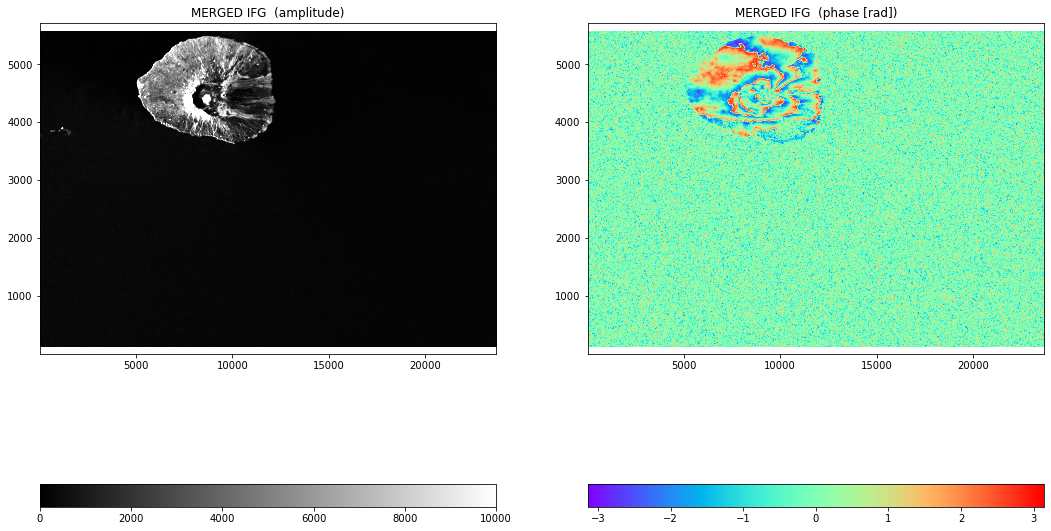

In [13]:
plotcomplexdata('merged/topophase.flat.vrt',title="MERGED IFG ",aspect=3,datamin=0, datamax=10000,draw_colorbar=True)

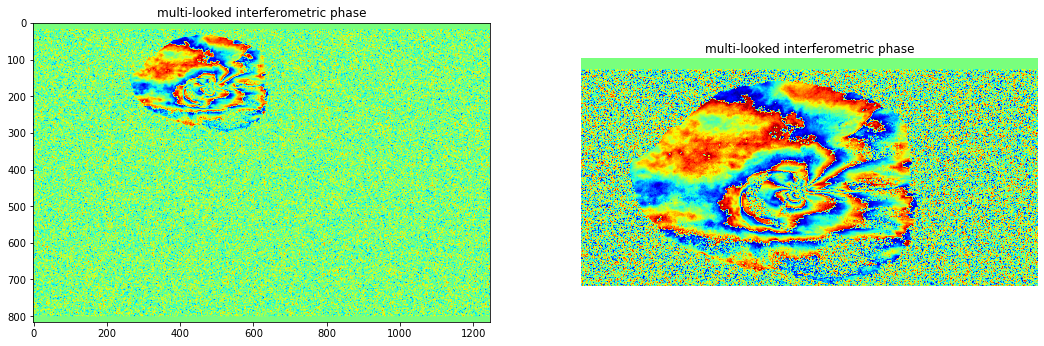

In [20]:
import gdal
import matplotlib.pyplot as plt
import numpy as np

# reading the multi-looked wrapped interferogram
ds = gdal.Open("merged/topophase.flat", gdal.GA_ReadOnly)
igram = ds.GetRasterBand(1).ReadAsArray()
ds = None

fig = plt.figure(figsize=(18, 16))

ax = fig.add_subplot(1,2,1)
ax.imshow(np.angle(igram), cmap='jet')
ax.set_title("multi-looked interferometric phase")

ax = fig.add_subplot(1,2,2)
ax.imshow(np.angle(igram), cmap='jet')
ax.set_xlim(200,800)
ax.set_ylim(300,0)
ax.set_title("multi-looked interferometric phase")
ax.set_axis_off()



igram = None

In [20]:
!topsApp.py --dostep=startup

This is the Open Source version of ISCE.
Some of the workflows depend on a separate licensed package.
To obtain the licensed package, please make a request for ISCE
through the website: https://download.jpl.nasa.gov/ops/request/index.cfm.
Alternatively, if you are a member, or can become a member of WinSAR
you may be able to obtain access to a version of the licensed sofware at
https://winsar.unavco.org/software/isce
2020-05-10 12:33:41,717 - isce.insar - INFO - ISCE VERSION = 2.3, RELEASE_SVN_REVISION = 2531,RELEASE_DATE = 20190112, CURRENT_SVN_REVISION = 2531
ISCE VERSION = 2.3, RELEASE_SVN_REVISION = 2531,RELEASE_DATE = 20190112, CURRENT_SVN_REVISION = 2531
Step processing
Running step startup
None
The currently supported sensors are:  ['SENTINEL1']
Dumping the application's pickle object _insar to file  PICKLE/startup
The remaining steps are (in order):  ['preprocess', 'computeBaselines', 'verifyDEM', 'topo', 'subsetoverlaps', 'coarseoffsets', 'coarseresamp', 'overlapifg', 'prepesd

In [21]:
ls PICKLE

startup  startup.xml


In [33]:
!topsApp.py --dostep=preprocess

This is the Open Source version of ISCE.
Some of the workflows depend on a separate licensed package.
To obtain the licensed package, please make a request for ISCE
through the website: https://download.jpl.nasa.gov/ops/request/index.cfm.
Alternatively, if you are a member, or can become a member of WinSAR
you may be able to obtain access to a version of the licensed sofware at
https://winsar.unavco.org/software/isce
2020-05-10 15:27:28,218 - isce.insar - INFO - ISCE VERSION = 2.3, RELEASE_SVN_REVISION = 2531,RELEASE_DATE = 20190112, CURRENT_SVN_REVISION = 2531
ISCE VERSION = 2.3, RELEASE_SVN_REVISION = 2531,RELEASE_DATE = 20190112, CURRENT_SVN_REVISION = 2531
Step processing
Running step preprocess
Input XML files:  ['/vsizip/../../slc/S1A_IW_SLC__1SSV_20141103T195043_20141103T195057_003122_00395A_F396.zip/S1A_IW_SLC__1SSV_20141103T195043_20141103T195057_003122_00395A_F396.SAFE/annotation/s1a-iw3-slc-vv-20141103t195045-20141103t195057-003122-00395a-003.xml']
Input TIFF files:  ['/vsiz

In [34]:
!topsApp.py --dostep=computeBaselines

This is the Open Source version of ISCE.
Some of the workflows depend on a separate licensed package.
To obtain the licensed package, please make a request for ISCE
through the website: https://download.jpl.nasa.gov/ops/request/index.cfm.
Alternatively, if you are a member, or can become a member of WinSAR
you may be able to obtain access to a version of the licensed sofware at
https://winsar.unavco.org/software/isce
2020-05-10 15:27:31,671 - isce.insar - INFO - ISCE VERSION = 2.3, RELEASE_SVN_REVISION = 2531,RELEASE_DATE = 20190112, CURRENT_SVN_REVISION = 2531
ISCE VERSION = 2.3, RELEASE_SVN_REVISION = 2531,RELEASE_DATE = 20190112, CURRENT_SVN_REVISION = 2531
Step processing
Running step computeBaselines
Estimated burst offset:  0
Polynomial Order: 0 - by - 0 
0	
Polynomial Order: 0 - by - 0 
0	
2020-05-10 15:27:32,287 - isce.topsinsar.runPreprocessor - INFO - 
####################################################################################################
    runComputeBaseline
-

In [35]:
!topsApp.py --dostep=verifyDEM

This is the Open Source version of ISCE.
Some of the workflows depend on a separate licensed package.
To obtain the licensed package, please make a request for ISCE
through the website: https://download.jpl.nasa.gov/ops/request/index.cfm.
Alternatively, if you are a member, or can become a member of WinSAR
you may be able to obtain access to a version of the licensed sofware at
https://winsar.unavco.org/software/isce
2020-05-10 15:27:37,430 - isce.insar - INFO - ISCE VERSION = 2.3, RELEASE_SVN_REVISION = 2531,RELEASE_DATE = 20190112, CURRENT_SVN_REVISION = 2531
ISCE VERSION = 2.3, RELEASE_SVN_REVISION = 2531,RELEASE_DATE = 20190112, CURRENT_SVN_REVISION = 2531
Step processing
Running step verifyDEM
command = curl -n  -L -c $HOME/.earthdatacookie -b $HOME/.earthdatacookie -k -f -O http://e4ftl01.cr.usgs.gov/MEASURES/SRTMGL1.003/2000.02.11/N15W025.SRTMGL1.hgt.zip
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload

command = curl -n  -L -c $HOME/.earthdatacookie -b $HOME/.earthdatacookie -k -f -O http://e4ftl01.cr.usgs.gov/MEASURES/SRTMGL1.003/2000.02.11/N15W024.SRTMGL1.hgt.zip
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   267  100   267    0     0    806      0 --:--:-- --:--:-- --:--:--   804
100   498  100   498    0     0    411      0  0:00:01  0:00:01 --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:02 --:--:--     0
curl: (22) The requested URL returned error: 401
2020-05-10 15:28:11,423 - isce.iscesys.DataRetriever - WARNING - There was a problem in retrieving the file  http://e4ftl01.cr.usgs.gov/MEASURES/SRTMGL1.003/2000.02.11/N15W024.SRTMGL1.hgt.zip. Requested file seems not present on server.
command = curl -n  -L -c $HOME/.earthdatacookie -b $HOME/.earthdatacookie -k -f -O http://e4ftl01.cr.usgs.gov/MEASURES/SRTMGL1.003/2000.02.11/N14W025.SRT

In [36]:
!export OMP_NUM_TREADS=4; topsApp.py --dostep=topo

This is the Open Source version of ISCE.
Some of the workflows depend on a separate licensed package.
To obtain the licensed package, please make a request for ISCE
through the website: https://download.jpl.nasa.gov/ops/request/index.cfm.
Alternatively, if you are a member, or can become a member of WinSAR
you may be able to obtain access to a version of the licensed sofware at
https://winsar.unavco.org/software/isce
2020-05-10 15:30:20,498 - isce.insar - INFO - ISCE VERSION = 2.3, RELEASE_SVN_REVISION = 2531,RELEASE_DATE = 20190112, CURRENT_SVN_REVISION = 2531
ISCE VERSION = 2.3, RELEASE_SVN_REVISION = 2531,RELEASE_DATE = 20190112, CURRENT_SVN_REVISION = 2531
Step processing
Running step topo
2020-05-10 15:30:20,994 - isce.zerodop.topozero - WARNING - Default Peg heading set to: -0.21228428573888292
Polynomial Order: 0 - by - 0 
0	
Polynomial Order: 0 - by - 1 
901090	2.32956	
GDAL open (R): demLat_N14_N16_Lon_W025_W023.dem.wgs84.vrt
API open (WR): geom_master/IW3/lat_01.rdr
API open 

2020-05-10 15:32:04,365 - isce.zerodop.topozero - WARNING - Default Peg heading set to: -0.21246100023412573
Polynomial Order: 0 - by - 0 
0	
Polynomial Order: 0 - by - 1 
901090	2.32956	
GDAL open (R): demLat_N14_N16_Lon_W025_W023.dem.wgs84.vrt
API open (WR): geom_master/IW3/lat_04.rdr
API open (WR): geom_master/IW3/lon_04.rdr
API open (WR): geom_master/IW3/hgt_04.rdr
API open (WR): geom_master/IW3/los_04.rdr
C pointer already created. Finalize and recreate if image dimensions changed.
C pointer already created. Finalize and recreate if image dimensions changed.
 Initializing biquintic interpolator
 Orbit interpolation method: hermite
 Max threads used:           12
 DEM parameters:
 Dimensions:         7200        7200
 Top Left:   -25.000000000000000        16.000000000000000     
 Spacing:    2.7777777777777778E-004  -2.7777777777777778E-004
 Lon:   -25.000000000000000       -23.000277777777779     
 Lat:    14.000277777777779        16.000000000000000     
  
 Estimated DEM bounds

In [37]:
!topsApp.py --dostep=subsetoverlaps

This is the Open Source version of ISCE.
Some of the workflows depend on a separate licensed package.
To obtain the licensed package, please make a request for ISCE
through the website: https://download.jpl.nasa.gov/ops/request/index.cfm.
Alternatively, if you are a member, or can become a member of WinSAR
you may be able to obtain access to a version of the licensed sofware at
https://winsar.unavco.org/software/isce
2020-05-10 15:37:13,579 - isce.insar - INFO - ISCE VERSION = 2.3, RELEASE_SVN_REVISION = 2531,RELEASE_DATE = 20190112, CURRENT_SVN_REVISION = 2531
ISCE VERSION = 2.3, RELEASE_SVN_REVISION = 2531,RELEASE_DATE = 20190112, CURRENT_SVN_REVISION = 2531
Step processing
Running step subsetoverlaps
Top:  ['master/overlaps/IW3/burst_top_01_02.slc']
Bottom:  ['master/overlaps/IW3/burst_bot_01_02.slc']
Top:  ['master/overlaps/IW3/burst_top_01_02.slc', 'master/overlaps/IW3/burst_top_02_03.slc']
Bottom:  ['master/overlaps/IW3/burst_bot_01_02.slc', 'master/overlaps/IW3/burst_bot_02_03.s

In [38]:
!topsApp.py --dostep=coarseoffsets

This is the Open Source version of ISCE.
Some of the workflows depend on a separate licensed package.
To obtain the licensed package, please make a request for ISCE
through the website: https://download.jpl.nasa.gov/ops/request/index.cfm.
Alternatively, if you are a member, or can become a member of WinSAR
you may be able to obtain access to a version of the licensed sofware at
https://winsar.unavco.org/software/isce
2020-05-10 15:40:47,523 - isce.insar - INFO - ISCE VERSION = 2.3, RELEASE_SVN_REVISION = 2531,RELEASE_DATE = 20190112, CURRENT_SVN_REVISION = 2531
ISCE VERSION = 2.3, RELEASE_SVN_REVISION = 2531,RELEASE_DATE = 20190112, CURRENT_SVN_REVISION = 2531
Step processing
Running step coarseoffsets
2020-05-10 15:40:47,655 - isce.topsinsar.coarseoffsets - INFO - Overlap pair 0, IW-3: Burst 0 of master matched with Burst 0 of slave
2020-05-10 15:40:47,668 - isce.topsinsar.coarseoffsets - INFO - Additional time offset applied in geo2rdr: 0.0 secs
2020-05-10 15:40:47,668 - isce.topsins

 Number of pixels outside the image:         1243
 Number of pixels with valid data:        2464974
 Number of pixels that converged:           20771
 elapsed time =    1.38281250      seconds
API close:  coarse_offsets/overlaps/IW3/range_bot_02_03.off
API open (R): coarse_offsets/overlaps/IW3/range_bot_02_03.off
API close:  coarse_offsets/overlaps/IW3/range_bot_02_03.off
API close:  coarse_offsets/overlaps/IW3/azimuth_bot_02_03.off
API open (R): coarse_offsets/overlaps/IW3/azimuth_bot_02_03.off
API close:  coarse_offsets/overlaps/IW3/azimuth_bot_02_03.off
GDAL close: geom_master/overlaps/IW3/lat_02_03.rdr.vrt
GDAL close: geom_master/overlaps/IW3/lon_02_03.rdr.vrt
GDAL close: geom_master/overlaps/IW3/hgt_02_03.rdr.vrt
2020-05-10 15:40:53,279 - isce.topsinsar.coarseoffsets - INFO - Overlap pair 2, IW-3: Burst 2 of master matched with Burst 2 of slave
2020-05-10 15:40:53,295 - isce.topsinsar.coarseoffsets - INFO - Additional time offset applied in geo2rdr: 0.0 secs
2020-05-10 15:40:53,29

In [39]:
!topsApp.py --dostep=coarseresamp

This is the Open Source version of ISCE.
Some of the workflows depend on a separate licensed package.
To obtain the licensed package, please make a request for ISCE
through the website: https://download.jpl.nasa.gov/ops/request/index.cfm.
Alternatively, if you are a member, or can become a member of WinSAR
you may be able to obtain access to a version of the licensed sofware at
https://winsar.unavco.org/software/isce
2020-05-10 15:41:27,164 - isce.insar - INFO - ISCE VERSION = 2.3, RELEASE_SVN_REVISION = 2531,RELEASE_DATE = 20190112, CURRENT_SVN_REVISION = 2531
ISCE VERSION = 2.3, RELEASE_SVN_REVISION = 2531,RELEASE_DATE = 20190112, CURRENT_SVN_REVISION = 2531
Step processing
Running step coarseresamp
Shifts for swath IW-3: {0: 0, 1: 2, 2: 3, 3: 2}
Polynomial Order: 0 - by - 0 
0	
Polynomial Order: 0 - by - 0 
0	
Chi squared: 0.000039
Polynomial Order: 5 - by - 3 
14973.1	-729.542	46.2095	1.23413	
-58475	2812.54	-147.294	-4.34754	
57090.9	-2710.27	111.423	3.7799	
-2.17189e-09	2.13583e-

 At line         1000
 Interpolating image
 Elapsed time:    2.95703125    
GDAL close: coarse_offsets/overlaps/IW3/range_top_02_03.off.vrt
GDAL close: coarse_offsets/overlaps/IW3/azimuth_top_02_03.off.vrt
GDAL close: slave/IW3/burst_02.slc.vrt
API close:  coarse_coreg/overlaps/IW3/burst_top_02_03.slc
API open (R): coarse_coreg/overlaps/IW3/burst_top_02_03.slc
API close:  coarse_coreg/overlaps/IW3/burst_top_02_03.slc
Adjust valid samples
Before:  0 23681
Offsets :  0 0
Adjust valid lines
Before:  0 113
Offsets :  0 0
After:  0 113
Chi squared: 0.000029
Polynomial Order: 5 - by - 3 
15043.3	-729.677	38.1409	1.12503	
-58610.3	2812.89	-131.502	-4.13646	
57088	-2710.59	111.441	3.78094	
-2.10811e-09	1.8304e-09	-6.50066e-10	0	
1.58687e-09	-5.01573e-10	0	0	
-4.64297e-10	0	0	0	
Misfit radians - Max: 0.00010664998990250751 , Min : -0.00020263240730855614 
2020-05-10 15:41:38,696 - isce.stdproc.resamp_slc - WARNING - The variable INPUT_LINES has been set to the default value 1690 which is the nu

Adjust valid samples
Before:  0 23681
Offsets :  0 0
Adjust valid lines
Before:  0 112
Offsets :  0 0
After:  0 112
Dumping the application's pickle object _insar to file  PICKLE/coarseresamp
The remaining steps are (in order):  ['overlapifg', 'prepesd', 'esd', 'rangecoreg', 'fineoffsets', 'fineresamp', 'ion', 'burstifg', 'mergebursts', 'filter', 'unwrap', 'unwrap2stage', 'geocode', 'denseoffsets', 'filteroffsets', 'geocodeoffsets']


In [40]:
!topsApp.py --dostep=overlapifg

This is the Open Source version of ISCE.
Some of the workflows depend on a separate licensed package.
To obtain the licensed package, please make a request for ISCE
through the website: https://download.jpl.nasa.gov/ops/request/index.cfm.
Alternatively, if you are a member, or can become a member of WinSAR
you may be able to obtain access to a version of the licensed sofware at
https://winsar.unavco.org/software/isce
2020-05-10 15:42:18,199 - isce.insar - INFO - ISCE VERSION = 2.3, RELEASE_SVN_REVISION = 2531,RELEASE_DATE = 20190112, CURRENT_SVN_REVISION = 2531
ISCE VERSION = 2.3, RELEASE_SVN_REVISION = 2531,RELEASE_DATE = 20190112, CURRENT_SVN_REVISION = 2531
Step processing
Running step overlapifg
GDAL open (R): coarse_interferogram/overlaps/IW3/burst_top_01_02.int.vrt
API open (WR): coarse_interferogram/overlaps/IW3/burst_top_01_02.7alks_19rlks.int
GDAL close: coarse_interferogram/overlaps/IW3/burst_top_01_02.int.vrt
API close:  coarse_interferogram/overlaps/IW3/burst_top_01_02.7alk

In [41]:
!topsApp.py --dostep=prepesd

This is the Open Source version of ISCE.
Some of the workflows depend on a separate licensed package.
To obtain the licensed package, please make a request for ISCE
through the website: https://download.jpl.nasa.gov/ops/request/index.cfm.
Alternatively, if you are a member, or can become a member of WinSAR
you may be able to obtain access to a version of the licensed sofware at
https://winsar.unavco.org/software/isce
2020-05-10 15:42:42,554 - isce.insar - INFO - ISCE VERSION = 2.3, RELEASE_SVN_REVISION = 2531,RELEASE_DATE = 20190112, CURRENT_SVN_REVISION = 2531
ISCE VERSION = 2.3, RELEASE_SVN_REVISION = 2531,RELEASE_DATE = 20190112, CURRENT_SVN_REVISION = 2531
Step processing
Running step prepesd
Relative shifts for swath 3:
{0: 0, 1: 2, 2: 3, 3: 2}
GDAL open (R): ESD/overlap_IW3_01.int.vrt
API open (WR): ESD/overlap_IW3_01.5alks_15rlks.int
GDAL close: ESD/overlap_IW3_01.int.vrt
API close:  ESD/overlap_IW3_01.5alks_15rlks.int
API open (R): ESD/overlap_IW3_01.5alks_15rlks.int
API close:

In [42]:
!topsApp.py --dostep=esd

This is the Open Source version of ISCE.
Some of the workflows depend on a separate licensed package.
To obtain the licensed package, please make a request for ISCE
through the website: https://download.jpl.nasa.gov/ops/request/index.cfm.
Alternatively, if you are a member, or can become a member of WinSAR
you may be able to obtain access to a version of the licensed sofware at
https://winsar.unavco.org/software/isce
2020-05-10 15:42:56,636 - isce.insar - INFO - ISCE VERSION = 2.3, RELEASE_SVN_REVISION = 2531,RELEASE_DATE = 20190112, CURRENT_SVN_REVISION = 2531
ISCE VERSION = 2.3, RELEASE_SVN_REVISION = 2531,RELEASE_DATE = 20190112, CURRENT_SVN_REVISION = 2531
Step processing
Running step esd
/home/robin/miniconda3/envs/isce2/lib/python3.8/site-packages/isce/components/isceobj/TopsProc/runESD.py:123: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The re

2020-05-10 15:42:56,886 - matplotlib - DEBUG - CACHEDIR=/home/robin/.cache/matplotlib
2020-05-10 15:42:56,890 - matplotlib.font_manager - DEBUG - Using fontManager instance from /home/robin/.cache/matplotlib/fontlist-v310.json
2020-05-10 15:42:56,986 - matplotlib.pyplot - DEBUG - Loaded backend agg version unknown.
2020-05-10 15:42:56,987 - matplotlib.pyplot - DEBUG - Loaded backend agg version unknown.
2020-05-10 15:42:57,035 - matplotlib.font_manager - DEBUG - findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
2020-05-10 15:42:57,035 - matplotlib.font_manager - DEBUG - findfont: score(<Font 'STIXGeneral' (STIXGeneralBolIta.ttf) italic normal bold normal>) = 11.335
2020-05-10 15:42:57,035 - matplotlib.font_manager - DEBUG - findfont: score(<Font 'DejaVu Sans' (DejaVuSans-Oblique.ttf) oblique normal 400 normal>) = 1.05
2020-05-10 15:42:57,035 - matplotlib.font_manager - DEBUG - findfont: score(<Font 'STIXNonUnicode' (STIXNonUniBolIta.ttf)

2020-05-10 15:42:57,115 - isce.topsinsar.esd - INFO - 
####################################################################################################
    runESD
----------------------------------------------------------------------------------------------------
esd.Mean = 0.0008386865588285727
esd.Median = 0.009361625649034977
esd.Std = 0.015103811469572062
esd.coherence threshold = 0.85
esd.number of coherent points = 1463
####################################################################################################
Dumping the application's pickle object _insar to file  PICKLE/esd
The remaining steps are (in order):  ['rangecoreg', 'fineoffsets', 'fineresamp', 'ion', 'burstifg', 'mergebursts', 'filter', 'unwrap', 'unwrap2stage', 'geocode', 'denseoffsets', 'filteroffsets', 'geocodeoffsets']


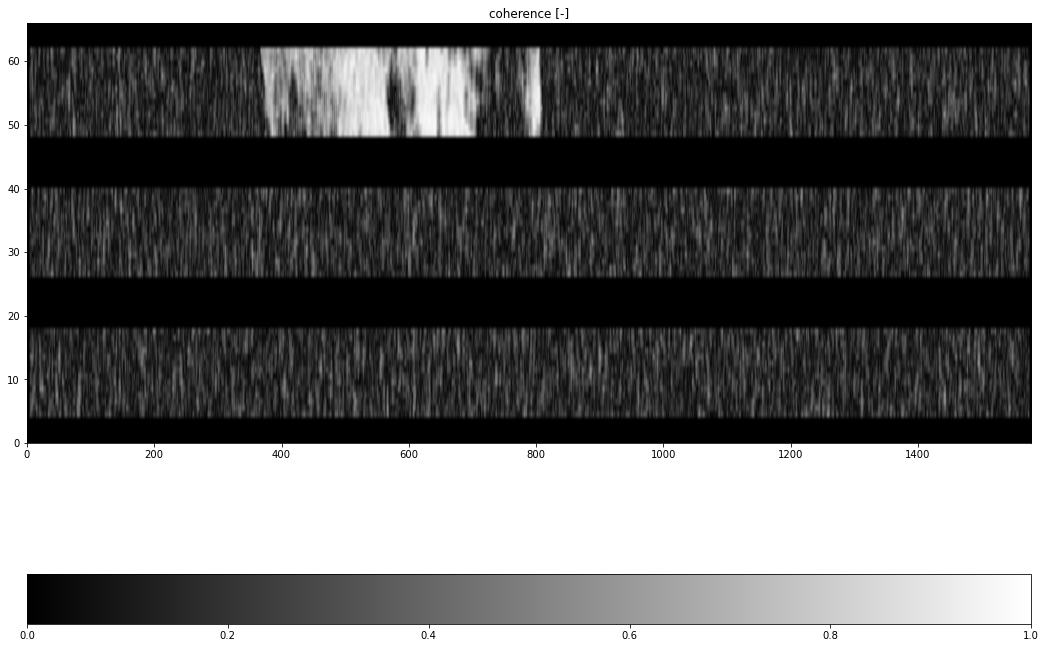

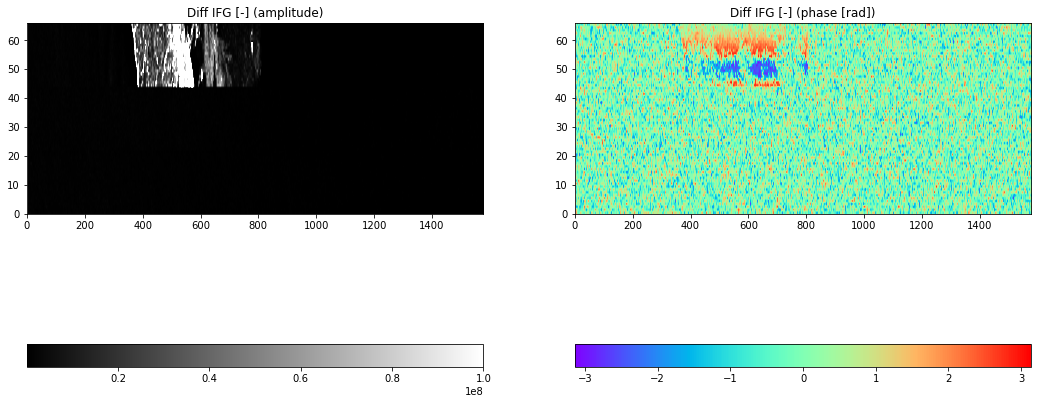

In [44]:
plotdata('ESD/combined_IW3.cor',1,title="coherence [-]",aspect=10, datamin=0, datamax=1,background='yes')
plotcomplexdata('ESD/combined_IW3.int',title="Diff IFG [-]",aspect=10,datamin=100000, datamax=100000000,draw_colorbar=True)

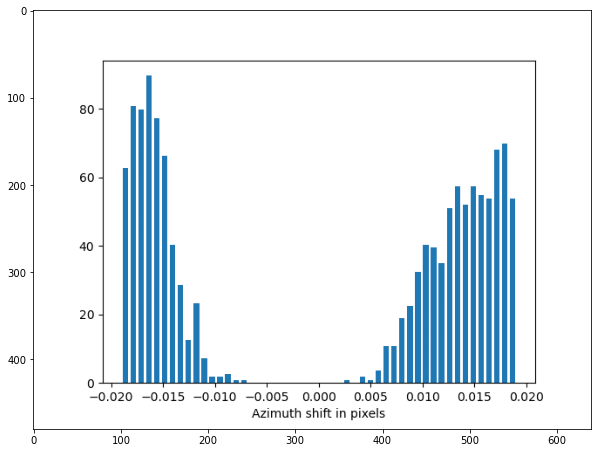

In [43]:
import matplotlib.image as mpimg
img= mpimg.imread("ESD/ESDmisregistration.png")
fig = plt.figure(figsize=(10, 11))
plt.imshow(img);

In [45]:
!topsApp.py --dostep=rangecoreg

This is the Open Source version of ISCE.
Some of the workflows depend on a separate licensed package.
To obtain the licensed package, please make a request for ISCE
through the website: https://download.jpl.nasa.gov/ops/request/index.cfm.
Alternatively, if you are a member, or can become a member of WinSAR
you may be able to obtain access to a version of the licensed sofware at
https://winsar.unavco.org/software/isce
2020-05-10 15:45:01,557 - isce.insar - INFO - ISCE VERSION = 2.3, RELEASE_SVN_REVISION = 2531,RELEASE_DATE = 20190112, CURRENT_SVN_REVISION = 2531
ISCE VERSION = 2.3, RELEASE_SVN_REVISION = 2531,RELEASE_DATE = 20190112, CURRENT_SVN_REVISION = 2531
Step processing
Running step rangecoreg
GDAL open (R): master/overlaps/IW3/burst_top_01_02.slc.vrt
GDAL open (R): coarse_coreg/overlaps/IW3/burst_top_01_02.slc.vrt
Scale Factor in Range:  1.0
Scale Factor in Azimuth:  1.0
Skip Sample Down: 4
Skip Sample Across: 551
 Input Bands:            1           1
  XXX start timer
 wisdomF

 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 XXX time for inner loop    4.00638580E-03
 At line =           85
 Bad match at level 1
 Bad match at level 1
 Bad matc

 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 XXX time for inner loop    4.17494774E-03
 At line =           69
 Bad match at level 1
 Bad match at level 1
 Bad matc

 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 e vector 2 error
 XXX time for inner loop   0.254709959    
 At line =           21
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 XXX time for inner loop   0.266454935    
 At line =           25
 Bad match at level 1
 Bad match at level 1
 XXX time for inner loop   0.271351814    
 At line =           29
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 XXX time for inner loop   0.253559828    
 At line =           33
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 XXX time for inner loop   0.258023024    
 At line =           37
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 XXX time

 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 XXX time for inner loop    4.07600403E-03
 At line =           89
 Bad match at level 1
 Bad match at level 1
 Bad matc

 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 XXX time for inner loop    4.11510468E-03
 At line =           77
 Bad match at level 1
 Bad match at level 1
 Bad matc

 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 XXX time for inner loop   0.251087904    
 At line =           21
 Bad match at level 1
 Bad match at level 1
 XXX time for inner loop   0.269010067    
 At line =           25
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 XXX time for inner loop   0.262531996    
 At line =           29
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 XXX time for inner loop   0.255773067    
 At line =           33
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 XXX time for inner loop   0.255101919    
 At line =           37
 Bad match at level 1
 Bad match at level 1
 XXX time for inner loop   0.269888163    
 At line =           41
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad

 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 XXX time for inner loop    4.23789024E-03
 At line =           93
 Bad match at level 1
 Bad match at level 1
 Bad matc

 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 Bad match at level 1
 XXX time for inner loop    4.31203842E-03
 At line =           73
 Bad match at level 1
 Bad match at level 1
 Bad matc

2020-05-10 15:45:31,636 - matplotlib - DEBUG - CACHEDIR=/home/robin/.cache/matplotlib
2020-05-10 15:45:31,638 - matplotlib.font_manager - DEBUG - Using fontManager instance from /home/robin/.cache/matplotlib/fontlist-v310.json
2020-05-10 15:45:31,714 - matplotlib.pyplot - DEBUG - Loaded backend agg version unknown.
2020-05-10 15:45:31,716 - matplotlib.pyplot - DEBUG - Loaded backend agg version unknown.
Looks like matplotlib could not save image to JPEG, continuing .....
Install Pillow to ensure debug plots for Residual range offsets are generated.
2020-05-10 15:45:31,745 - isce.topsinsar.rangecoreg - INFO - 
####################################################################################################
    runRangeCoreg
----------------------------------------------------------------------------------------------------
esd.Mean = -0.48473112535612534
esd.Median = -0.71875
esd.Std = 0.5446515760133175
esd.number of coherent points = 351
esd.snr threshold = 8.0
####################

In [51]:
!topsApp.py --dostep=fineoffsets

This is the Open Source version of ISCE.
Some of the workflows depend on a separate licensed package.
To obtain the licensed package, please make a request for ISCE
through the website: https://download.jpl.nasa.gov/ops/request/index.cfm.
Alternatively, if you are a member, or can become a member of WinSAR
you may be able to obtain access to a version of the licensed sofware at
https://winsar.unavco.org/software/isce
2020-05-10 15:55:10,260 - isce.insar - INFO - ISCE VERSION = 2.3, RELEASE_SVN_REVISION = 2531,RELEASE_DATE = 20190112, CURRENT_SVN_REVISION = 2531
ISCE VERSION = 2.3, RELEASE_SVN_REVISION = 2531,RELEASE_DATE = 20190112, CURRENT_SVN_REVISION = 2531
Step processing
Running step fineoffsets
2020-05-10 15:55:10,395 - isce.topsinsar.fineoffsets - INFO - IW3 - Burst 0 of master matched with Burst 0 of slave
GDAL open (R): geom_master/IW3/lat_01.rdr.vrt
GDAL open (R): geom_master/IW3/lon_01.rdr.vrt
GDAL open (R): geom_master/IW3/hgt_01.rdr.vrt
2020-05-10 15:55:10,410 - isce.topsi

API open (R): fine_offsets/IW3/azimuth_04.off
API close:  fine_offsets/IW3/azimuth_04.off
GDAL close: geom_master/IW3/lat_04.rdr.vrt
GDAL close: geom_master/IW3/lon_04.rdr.vrt
GDAL close: geom_master/IW3/hgt_04.rdr.vrt
Dumping the application's pickle object _insar to file  PICKLE/fineoffsets
The remaining steps are (in order):  ['fineresamp', 'ion', 'burstifg', 'mergebursts', 'filter', 'unwrap', 'unwrap2stage', 'geocode', 'denseoffsets', 'filteroffsets', 'geocodeoffsets']


In [52]:
!topsApp.py --dostep=fineresamp

This is the Open Source version of ISCE.
Some of the workflows depend on a separate licensed package.
To obtain the licensed package, please make a request for ISCE
through the website: https://download.jpl.nasa.gov/ops/request/index.cfm.
Alternatively, if you are a member, or can become a member of WinSAR
you may be able to obtain access to a version of the licensed sofware at
https://winsar.unavco.org/software/isce
2020-05-10 15:57:23,195 - isce.insar - INFO - ISCE VERSION = 2.3, RELEASE_SVN_REVISION = 2531,RELEASE_DATE = 20190112, CURRENT_SVN_REVISION = 2531
ISCE VERSION = 2.3, RELEASE_SVN_REVISION = 2531,RELEASE_DATE = 20190112, CURRENT_SVN_REVISION = 2531
Step processing
Running step fineresamp
Shifts IW-3:  {0: 0, 1: 2, 2: 3, 3: 2}
Polynomial Order: 0 - by - 0 
0	
Polynomial Order: 0 - by - 0 
0	
Chi squared: 0.000039
Polynomial Order: 5 - by - 3 
14973.1	-729.542	46.2095	1.23413	
-58475	2812.54	-147.294	-4.34754	
57090.9	-2710.27	111.423	3.7799	
-2.17189e-09	2.13583e-09	-7.72493

 At line         1000
 Interpolating image
 At line         1000
 Elapsed time:    11.8671875    
GDAL close: fine_offsets/IW3/range_03.off.vrt
GDAL close: fine_offsets/IW3/azimuth_03.off.vrt
GDAL close: slave/IW3/burst_03.slc.vrt
API close:  fine_coreg/IW3/burst_03.slc
API open (R): fine_coreg/IW3/burst_03.slc
API close:  fine_coreg/IW3/burst_03.slc
Adjust valid samples
Before:  0 23681
Offsets :  -11.914570808410645 -11.291465759277344
Adjust valid lines
Before:  119 1454
Offsets :  -4.693536281585693 -4.431179523468018
After:  127 1448
Chi squared: 0.000029
Polynomial Order: 5 - by - 3 
15042.9	-729.719	38.1455	1.12524	
-58608.7	2813.06	-131.52	-4.13727	
57086.4	-2710.76	111.459	3.78173	
-3.09373e-09	3.05688e-09	-1.02937e-09	0	
2.26277e-09	-8.71209e-10	0	0	
-6.51426e-10	0	0	0	
Misfit radians - Max: 0.00010668381946743466 , Min : -0.00020269672677386552 
2020-05-10 15:58:04,102 - isce.stdproc.resamp_slc - WARNING - The variable INPUT_LINES has been set to the default value 1690 which

In [53]:
!topsApp.py --dostep=burstifg

This is the Open Source version of ISCE.
Some of the workflows depend on a separate licensed package.
To obtain the licensed package, please make a request for ISCE
through the website: https://download.jpl.nasa.gov/ops/request/index.cfm.
Alternatively, if you are a member, or can become a member of WinSAR
you may be able to obtain access to a version of the licensed sofware at
https://winsar.unavco.org/software/isce
2020-05-10 15:58:27,651 - isce.insar - INFO - ISCE VERSION = 2.3, RELEASE_SVN_REVISION = 2531,RELEASE_DATE = 20190112, CURRENT_SVN_REVISION = 2531
ISCE VERSION = 2.3, RELEASE_SVN_REVISION = 2531,RELEASE_DATE = 20190112, CURRENT_SVN_REVISION = 2531
Step processing
Cannot open PICKLE/ion
Running step burstifg
Traceback (most recent call last):
  File "/home/robin/miniconda3/envs/isce2/lib/python3.8/site-packages/isce/applications/topsApp.py", line 1041, in <module>
    insar.run()
  File "/home/robin/miniconda3/envs/isce2/lib/python3.8/site-packages/isce/components/iscesys/C